## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

As for today's discussion I don't have codes written as it took a lot of time in understanding the github commit.
But we have got our approach and divided our work as well.

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
working_dir = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Week 4/Day 3/Play Store Data.csv'
apps_df = pd.read_csv(working_dir)

In [62]:
working_dirt = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Week 4/Day 3/User Reviews.csv'
app_df = pd.read_csv(working_dirt)

In [5]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [70]:
# Dropping the missing data
app_df.dropna(inplace=True)
app_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


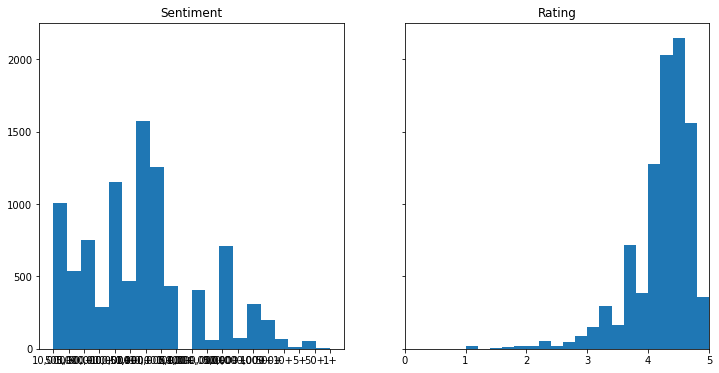

In [26]:
# Create the plot for the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Create the histograms
ax[0].hist(apps_df.Installs, bins=20)
ax[1].hist(apps_df.Rating, bins=20)
ax[1].set_xlim(0, 5)

# Add titles
ax[0].set_title("Sentiment")
ax[1].set_title("Rating")

plt.show()

In [43]:
# Drop the missing data
app_df.dropna(inplace=True)

# Drop the column which won't be used
app_df.drop("Translated_Review", axis=1, inplace=True)

# Rename the remaining columns
app_df.columns = ["App", "Sentiment", "Polarity", "Subjectivity"]



In [46]:
# Creating a likert state
likert = {
  "Negative": -1,
  "Neutral": 0,
  "Positive": 1
}

# Transform the Sentiment Column
app_df.Sentiment = app_df.Sentiment.apply(lambda x: likert[x]).copy()
# Obtaining the mean by groupping the elements together
app_df_mean = app_df.groupby("App").mean().copy()

In [48]:
app_df_mean

,Sentiment,Polarity,Subjectivity
App,,,
10 Best Foods for You,0.783505,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.750000,0.392405,0.545516
11st,0.410256,0.185943,0.455340
1800 Contacts - Lens Store,0.725000,0.318145,0.591098
1LINE – One Line with One Touch,0.500000,0.196290,0.557315
...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.264706,0.101622,0.545444
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.411765,0.251765,0.393284
Hotstar,0.000000,0.038178,0.493964


In [73]:
app_df_mean = app_df.groupby("App").mean().copy()

app_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 865 entries, 10 Best Foods for You to Housing-Real Estate & Property
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sentiment_Polarity      865 non-null    float64
 1   Sentiment_Subjectivity  865 non-null    float64
dtypes: float64(2)
memory usage: 20.3+ KB


In [77]:
merge_data = pd.merge(left=apps_df, right=app_df_mean, on="App").copy()

merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52729 entries, 0 to 52728
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   App                       52729 non-null  object 
 1   Translated_Review         37427 non-null  object 
 2   Sentiment                 37432 non-null  object 
 3   Sentiment_Polarity_x      37432 non-null  float64
 4   Sentiment_Subjectivity_x  37432 non-null  float64
 5   Sentiment_Polarity_y      52729 non-null  float64
 6   Sentiment_Subjectivity_y  52729 non-null  float64
dtypes: float64(4), object(3)
memory usage: 3.2+ MB


In [81]:
sentiment_median = np.median(merge_data.Sentiment)
rating_median = np.median(merge_data.Rating)

# Plot the scatter graph
merge_data.plot("Sentiment", "Rating", kind="scatter", figsize=(8, 7))
plt.show()

TypeError: ignored

In [30]:
# Separate by Type
free = apps_df.loc[apps_df.Type == "Free"].copy()
paid = apps_df.loc[apps_df.Type == "Paid"].copy()

# Obtain the means
free_mean = free.Rating.mean()
paid_mean = paid.Rating.mean()
print(free_mean)
print(paid_mean)


4.186288009179587
4.266821705426354
